In [1]:
import pandas as pd

pd.set_option('display.max_columns', 100)

df_mod = pd.read_parquet('../../../data/model_data/model_data_single_output.parquet')

df_mod = df_mod.loc[df_mod['Position'] == 'DST', :].reset_index(drop=True)

df_mod

,Season,Week,Name,Position,Team,Fantasy Points,Rank,Position Rank,Adjusted Passing Yards Projection,Adjusted Passing Touchdowns Projection,Adjusted Interceptions Projection,Adjusted Rushing Yards Projection,Adjusted Receiving Yards Projection,Adjusted Receptions Projection,Anytime Touchdown Probability,Location,Team Projected Score,Opponent Projected Score
0,2020,1,Buffalo Bills,DST,BUF,8.0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.75,17.25
1,2020,1,Pittsburgh Steelers,DST,PIT,8.0,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,25.00,19.00
2,2020,1,Baltimore Ravens,DST,BAL,15.0,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,27.25,20.25
3,2020,1,New England Patriots,DST,NE,11.0,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,24.50,17.00
4,2020,1,Philadelphia Eagles,DST,PHI,3.0,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,22.00,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,2023,17,Cincinnati Bengals,DST,CIN,4.0,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,19.50,26.50
2012,2023,17,Detroit Lions,DST,DET,6.0,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,24.50,29.00
2013,2023,17,New York Giants,DST,NYG,16.0,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,18.75,24.75
2014,2023,17,Arizona Cardinals,DST,ARI,2.0,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,17.75,30.25


In [2]:
X = df_mod[[
    'Position Rank',
    'Location',
    'Team Projected Score',
    'Opponent Projected Score',
]].copy()

X

,Position Rank,Location,Team Projected Score,Opponent Projected Score
0,1,1.0,23.75,17.25
1,2,-1.0,25.00,19.00
2,3,1.0,27.25,20.25
3,4,1.0,24.50,17.00
4,5,-1.0,22.00,16.50
...,...,...,...,...
2011,28,-1.0,19.50,26.50
2012,29,-1.0,24.50,29.00
2013,30,1.0,18.75,24.75
2014,31,-1.0,17.75,30.25


In [3]:
points_rounded = df_mod['Fantasy Points'].round().astype(int)

points_rounded

0        8
1        8
2       15
3       11
4        3
        ..
2011     4
2012     6
2013    16
2014     2
2015     1
Name: Fantasy Points, Length: 2016, dtype: int32

In [4]:
import numpy as np

# first column: -5 points scored
# last column: 55 points scored
y = np.zeros(shape=(points_rounded.shape[0], 60))

for i in range(y.shape[0]):
    y[i, points_rounded.iloc[i] + 4] = 1

y = pd.DataFrame(
    y,
    columns=[f"{i - 4} Fantasy Points" for i in range(y.shape[1])]
)

y

,-4 Fantasy Points,-3 Fantasy Points,-2 Fantasy Points,-1 Fantasy Points,0 Fantasy Points,1 Fantasy Points,2 Fantasy Points,3 Fantasy Points,4 Fantasy Points,5 Fantasy Points,6 Fantasy Points,7 Fantasy Points,8 Fantasy Points,9 Fantasy Points,10 Fantasy Points,11 Fantasy Points,12 Fantasy Points,13 Fantasy Points,14 Fantasy Points,15 Fantasy Points,16 Fantasy Points,17 Fantasy Points,18 Fantasy Points,19 Fantasy Points,20 Fantasy Points,21 Fantasy Points,22 Fantasy Points,23 Fantasy Points,24 Fantasy Points,25 Fantasy Points,26 Fantasy Points,27 Fantasy Points,28 Fantasy Points,29 Fantasy Points,30 Fantasy Points,31 Fantasy Points,32 Fantasy Points,33 Fantasy Points,34 Fantasy Points,35 Fantasy Points,36 Fantasy Points,37 Fantasy Points,38 Fantasy Points,39 Fantasy Points,40 Fantasy Points,41 Fantasy Points,42 Fantasy Points,43 Fantasy Points,44 Fantasy Points,45 Fantasy Points,46 Fantasy Points,47 Fantasy Points,48 Fantasy Points,49 Fantasy Points,50 Fantasy Points,51 Fantasy Points,52 Fantasy Points,53 Fantasy Points,54 Fantasy Points,55 Fantasy Points
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
groups = df_mod['Season'].astype(str) + ' Week ' + df_mod['Week'].astype(str)

groups

0        2020 Week 1
1        2020 Week 1
2        2020 Week 1
3        2020 Week 1
4        2020 Week 1
            ...     
2011    2023 Week 17
2012    2023 Week 17
2013    2023 Week 17
2014    2023 Week 17
2015    2023 Week 17
Length: 2016, dtype: object

In [6]:
df_folds = pd.read_parquet('../../../data/model_data/folds.parquet')

df_folds

,Fold ID,Season Week
0,0,2022 Week 3
1,0,2021 Week 7
2,0,2021 Week 1
3,0,2023 Week 16
4,0,2021 Week 11
...,...,...
62,2,2020 Week 15
63,2,2023 Week 14
64,2,2021 Week 5
65,2,2022 Week 6


In [7]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

pd.options.mode.chained_assignment = None

# splitter = GroupKFold(n_splits=3)

cv_data = []
# for is_indexes, oos_indexes in splitter.split(X=X, y=y, groups=groups):
for fold in df_folds['Fold ID'].unique():
    oos_season_week = df_folds.loc[df_folds['Fold ID'] == fold, 'Season Week']
    is_indexes = df_mod.loc[~groups.isin(oos_season_week), :].index
    oos_indexes = df_mod.loc[groups.isin(oos_season_week), :].index
    # split
    X_is = X.iloc[is_indexes]
    X_oos = X.iloc[oos_indexes]

    y_is = y.iloc[is_indexes]
    y_oos = y.iloc[oos_indexes]

    groups_is = groups.iloc[is_indexes]
    df_mod_oos = df_mod.iloc[oos_indexes]

    gss = GroupShuffleSplit(n_splits=1, test_size=0.15, random_state=22)
    for train_indexes, val_indexes in gss.split(X=X_is, y=y_is, groups=groups_is):
            X_train = X_is.iloc[train_indexes]
            X_val = X_is.iloc[val_indexes]

            y_train = y_is.iloc[train_indexes]
            y_val = y_is.iloc[val_indexes]

    # impute
    scaler = StandardScaler()
    imputer = IterativeImputer(initial_strategy='median', max_iter=100)

    X_train_fill_na = imputer.fit_transform(scaler.fit_transform(X_train))
    X_train[X_train.columns] = scaler.inverse_transform(X_train_fill_na).copy()

    scaler2 = MinMaxScaler(clip=True)  # maybe normalize and clip instead of standardize?
    scaler3 = StandardScaler()
    X_train[X_train.columns] = scaler3.fit_transform(scaler2.fit_transform(X_train)).copy()

    X_val_fill_na = imputer.transform(scaler.transform(X_val))
    X_val[X_val.columns] = scaler.inverse_transform(X_val_fill_na).copy()

    X_val[X_val.columns] = scaler3.transform(scaler2.transform(X_val)).copy()

    X_oos_fill_na = imputer.transform(scaler.transform(X_oos))
    X_oos[X_oos.columns] = scaler.inverse_transform(X_oos_fill_na).copy()

    X_oos[X_oos.columns] = scaler3.transform(scaler2.transform(X_oos)).copy()

    cv_data.append((X_train, X_val, X_oos, y_train, y_val, y_oos, df_mod_oos))

for X_train, X_val, X_oos, y_train, y_val, y_oos, df_mod_oos in cv_data:
    print(X_train.shape, X_val.shape, X_oos.shape, y_train.shape, y_val.shape, y_oos.shape, df_mod_oos.shape)

(1106, 4) (216, 4) (694, 4) (1106, 60) (216, 60) (694, 60) (694, 18)
(1156, 4) (212, 4) (648, 4) (1156, 60) (212, 60) (648, 60) (648, 18)
(1138, 4) (204, 4) (674, 4) (1138, 60) (204, 60) (674, 60) (674, 18)


In [8]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.config.experimental import enable_op_determinism
from tensorflow.random import set_seed
import numpy as np
import os

os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

def build_and_compile_model(input_shape: tuple, output_shape: int, hidden_layer_neurons: list, l1s: list, l2s: list, learning_rate: float):
    enable_op_determinism()
    set_seed(22)
    
    inputs = Input(shape=input_shape, name='input')

    h = inputs
    for i, neurons in enumerate(hidden_layer_neurons):
        h = Dense(
            neurons, 
            activation='relu', 
            kernel_initializer=GlorotNormal(seed=22), 
            kernel_regularizer=L1L2(l1=l1s[i], l2=l2s[i]), 
            name=f"hidden_{i+1}"
        )(h)

    outputs = Dense(output_shape, activation='softmax', kernel_initializer=GlorotNormal(seed=22), name='outputs')(h)

    mod = Model(inputs=inputs, outputs=outputs)

    mod.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return mod

mod = build_and_compile_model(X.shape[1:], y.shape[1], [128, 32], [0, 0.01], [0, 0.01], learning_rate=0.001)

mod.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 4)]               0         
                                                                 
 hidden_1 (Dense)            (None, 128)               640       
                                                                 
 hidden_2 (Dense)            (None, 32)                4128      
                                                                 
 outputs (Dense)             (None, 60)                1980      
                                                                 
Total params: 6,748
Trainable params: 6,748
Non-trainable params: 0
_________________________________________________________________


In [9]:
from sklearn.metrics import log_loss
import optuna

def objective(trial, cv_data=cv_data):
# model tuning
    n_hidden_layers = trial.suggest_int(f"n_hidden_layers", 1, 3)

    hidden_layer_neurons = []
    l1s = []
    l2s = []
    for i in range(n_hidden_layers):
        hidden_layer_neurons.append(trial.suggest_categorical(f"hidden_layer_{i+1}_neurons", [2**n for n in range(5, 12)]))  # change to (3, 12)
        # hidden_layer_neurons.append(trial.suggest_categorical(f"hidden_layer_{i+1}_neurons", [2**n for n in range(4, 9)]))  # bump this up
        l1s.append(trial.suggest_float(f"hidden_layer_{i+1}_l1", 0.0, 0.1))  # change to (0.0, 0.05)
        l2s.append(trial.suggest_float(f"hidden_layer_{i+1}_l2", 0.0, 0.1))  # change to (0.0, 0.20)

    learning_rate = trial.suggest_float(f"learning_rate", 0.01, 0.10)
    batch_size = trial.suggest_categorical(f"batch_size", [2**n for n in range(10, 16)])
    # batch_size = trial.suggest_categorical(f"batch_size", [2**n for n in range(4, 12)])  # bump this up

    # cross validation
    y_oos_list = []
    y_pred_list = []
    for X_train, X_val, X_oos, y_train, y_val, y_oos, df_mod_oos in cv_data:
        # make sure to build mod in loop to prevent history
        mod = build_and_compile_model(X_train.shape[1:], y_train.shape[1], hidden_layer_neurons, l1s, l2s, learning_rate)

        mod.fit(
            X_train,
            y_train,
            validation_data=(X_val, y_val),
            batch_size=batch_size,
            epochs=500,
            callbacks=[EarlyStopping(patience=10, restore_best_weights=True)],
            verbose=0,
        )

        y_oos_list.append(y_oos)
        y_pred_list.append(mod.predict(X_oos, verbose=0))


    y_oos_concat = np.vstack(y_oos_list)
    y_pred_concat = np.vstack(y_pred_list)

    print(y_oos_concat.shape, y_pred_concat.shape)

    return log_loss(y_oos_concat, y_pred_concat)

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=22, n_startup_trials=10, multivariate=True, warn_independent_sampling=False))
study.optimize(objective, n_trials=20, show_progress_bar=True)

study.best_params

c:\Users\mhugh\anaconda3\envs\clean2\lib\site-packages\optuna\_experimental.py:30: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2024-10-22 14:35:10,931] A new study created in memory with name: no-name-9d924e1e-7616-43b1-a546-ba6e78c45bba


  0%|          | 0/20 [00:00<?, ?it/s]

(2016, 60) (2016, 60)
[I 2024-10-22 14:35:27,320] Trial 0 finished with value: 3.1005228090109362 and parameters: {'n_hidden_layers': 1, 'hidden_layer_1_neurons': 128, 'hidden_layer_1_l1': 0.022040451663772567, 'hidden_layer_1_l2': 0.08119509205386867, 'learning_rate': 0.01094741868844976, 'batch_size': 2048}. Best is trial 0 with value: 3.1005228090109362.
(2016, 60) (2016, 60)
[I 2024-10-22 14:35:37,618] Trial 1 finished with value: 3.13424878962863 and parameters: {'n_hidden_layers': 3, 'hidden_layer_1_neurons': 128, 'hidden_layer_1_l1': 0.058428964315689495, 'hidden_layer_1_l2': 0.07026355188654519, 'hidden_layer_2_neurons': 128, 'hidden_layer_2_l1': 0.08749277452777171, 'hidden_layer_2_l2': 0.07449320773686179, 'hidden_layer_3_neurons': 256, 'hidden_layer_3_l1': 0.009588460991804116, 'hidden_layer_3_l2': 0.004521011190769353, 'learning_rate': 0.07163458468004151, 'batch_size': 1024}. Best is trial 0 with value: 3.1005228090109362.
(2016, 60) (2016, 60)
[I 2024-10-22 14:35:50,975] 

{'n_hidden_layers': 1,
 'hidden_layer_1_neurons': 128,
 'hidden_layer_1_l1': 0.009972878789203367,
 'hidden_layer_1_l2': 0.09795208341638789,
 'learning_rate': 0.01762343174680706,
 'batch_size': 8192}

3.097120284820966

In [10]:
n_hidden_layers = study.best_params['n_hidden_layers']

hidden_layer_neurons = []
l1s = []
l2s = []
for i in range(n_hidden_layers):
    hidden_layer_neurons.append(study.best_params[f"hidden_layer_{i+1}_neurons"])
    l1s.append(study.best_params[f"hidden_layer_{i+1}_l1"])
    l2s.append(study.best_params[f"hidden_layer_{i+1}_l2"])

learning_rate = study.best_params[f"learning_rate"]
batch_size = study.best_params[f"batch_size"]

y_oos_list = []
y_pred_list = []
testing_data = []
for X_train, X_val, X_oos, y_train, y_val, y_oos, df_mod_oos in cv_data:
    # make sure to build mod in loop to prevent history
    mod = build_and_compile_model(X_train.shape[1:], y_train.shape[1], hidden_layer_neurons, l1s, l2s, learning_rate)

    mod.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=500,
        callbacks=[EarlyStopping(patience=10, restore_best_weights=True)],
        verbose=1,
    )

    y_preds = mod.predict(X_oos, verbose=0)

    df_preds = pd.DataFrame(
        y_preds,
        columns=y.columns
    )

    testing_data.append(pd.concat((df_mod_oos.reset_index(drop=True), df_preds), axis=1))


    y_oos_list.append(y_oos)
    y_pred_list.append(y_preds)

df_test = pd.concat(testing_data, ignore_index=True)

y_oos_concat = np.vstack(y_oos_list)
y_pred_concat = np.vstack(y_pred_list)

print(f"OOS Log Loss: {log_loss(y_oos_concat, y_pred_concat)}")

Epoch 1/500
1/1 [==============================] - 1s 908ms/step - loss: 5.3913 - accuracy: 0.0045 - val_loss: 4.8637 - val_accuracy: 0.0556
Epoch 2/500
1/1 [==============================] - 0s 49ms/step - loss: 4.8832 - accuracy: 0.0633 - val_loss: 4.4805 - val_accuracy: 0.0602
Epoch 3/500
1/1 [==============================] - 0s 55ms/step - loss: 4.5003 - accuracy: 0.0660 - val_loss: 4.1761 - val_accuracy: 0.0741
Epoch 4/500
1/1 [==============================] - 0s 55ms/step - loss: 4.1941 - accuracy: 0.0750 - val_loss: 3.9311 - val_accuracy: 0.0741
Epoch 5/500
1/1 [==============================] - 0s 50ms/step - loss: 3.9460 - accuracy: 0.0759 - val_loss: 3.7268 - val_accuracy: 0.0787
Epoch 6/500
1/1 [==============================] - 0s 53ms/step - loss: 3.7383 - accuracy: 0.0805 - val_loss: 3.5547 - val_accuracy: 0.0741
Epoch 7/500
1/1 [==============================] - 0s 52ms/step - loss: 3.5650 - accuracy: 0.0787 - val_loss: 3.4194 - val_accuracy: 0.0741
Epoch 8/500
1/1 [==

In [11]:
def get_random_distribution(row):
    distribution = row[[f"{i} Fantasy Points" for i in range(-4, 56)]].astype('float64')/row[[f"{i} Fantasy Points" for i in range(-4, 56)]].astype('float64').sum()

    return np.random.choice([i for i in range(-4, 56)], p=distribution, size=1_000)

# get_random_distribution(df_test.iloc[1])

In [12]:
(df_test['Fantasy Points'] < 0).mean()

0.06944444444444445

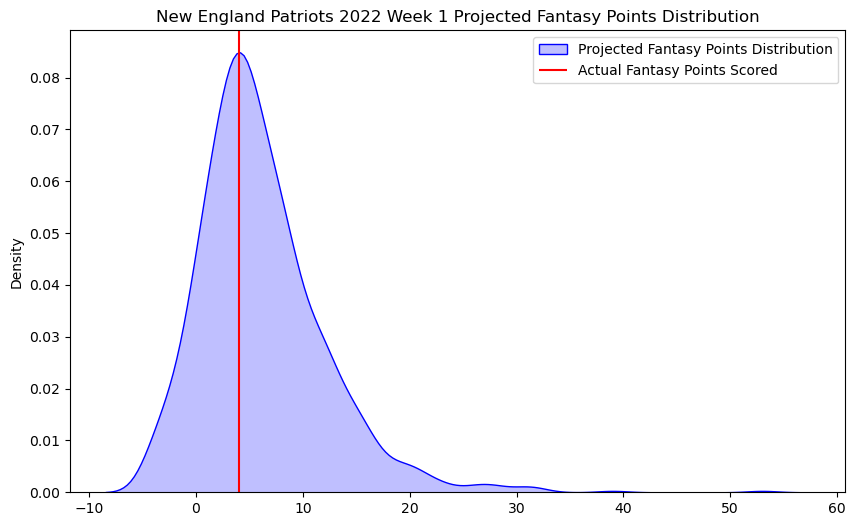

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(22)

row = df_test.iloc[1_000]

plt.figure(figsize=(10, 6))

random_distribution = get_random_distribution(row)

ax = sns.kdeplot(random_distribution, fill=True, bw_adjust=1.0, color='blue', label='Projected Fantasy Points Distribution')

current_limits = ax.get_ylim()

plt.vlines(x=row['Fantasy Points'], ymin=0.0, ymax=1.0, colors=['red'], label='Actual Fantasy Points Scored')

ax.set_ylim(current_limits)

plt.title(f"{row['Name'].title()} {row['Season']} Week {row['Week']} Projected Fantasy Points Distribution")

plt.legend()

plt.show()

In [14]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(
    df_test['Fantasy Points'],
    np.dot(np.array([i for i in range(-4, 56)]), df_test[[f"{i} Fantasy Points" for i in range(-4, 56)]].transpose()),
)

5.618158848503356

In [15]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(
    df_test['Fantasy Points'],
    np.dot(np.array([i for i in range(-4, 56)]), df_test[[f"{i} Fantasy Points" for i in range(-4, 56)]].transpose()),
)

4.332050911573073

How often do players end up in certain percentiles?

In [16]:
percentiles = [(df_test.iloc[i]['Fantasy Points'] > get_random_distribution(df_test.iloc[i])).mean() for i in range(df_test.shape[0])]

len(percentiles)

2016

<Axes: ylabel='Count'>

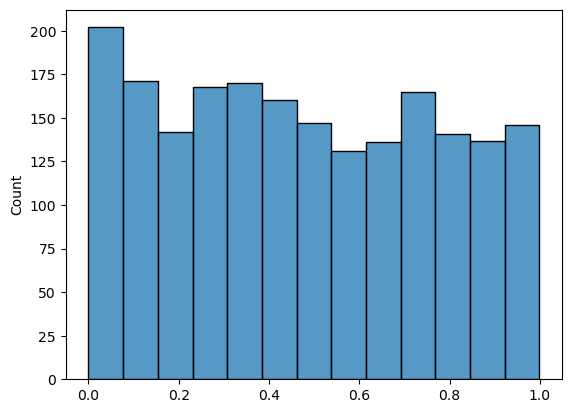

In [17]:
sns.histplot(
    x=percentiles,
)

In [18]:
pd.Series(percentiles).describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    2016.000000
mean        0.475555
std         0.292919
min         0.000000
1%          0.000000
5%          0.040000
10%         0.076500
25%         0.225750
50%         0.459000
75%         0.735250
90%         0.892500
95%         0.944000
99%         0.987000
max         0.999000
dtype: float64